In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

#Data Preprocessing


In [3]:
cols =["flength","fwidth","fsize","fconc1","fAsym","fM3long","fM3Trans","fAlfa","fDist","class"]
df=pd.read_csv("magic04.data",names=cols)
df.head()

,flength,fwidth,fsize,fconc1,fAsym,fM3long,fM3Trans,fAlfa,fDist,class
28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [4]:
df['class']=(df['class']=='g').astype(int)

In [5]:
df.head()

,flength,fwidth,fsize,fconc1,fAsym,fM3long,fM3Trans,fAlfa,fDist,class
28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


In [ ]:
for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label], color='blue', label='gamma', alpha=0.7, density=True)
  plt.hist(df[df['class']==0][label], color='red', label='hadron', alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

#Train,Validation,Test Datasets


In [6]:
train , valid, test = np.split(df.sample(frac=1).reset_index(drop=True), [int(0.6*len(df)), int(0.8*len(df))])

In [7]:
def scale_dataset(dataframe, oversample=False):
  X=dataframe[dataframe.columns[:-1]].values
  y=dataframe[dataframe.columns[-1]].values

  scaler=StandardScaler()
  X=scaler.fit_transform(X)

  ros=RandomOverSampler()
  if oversample:
    X, y=ros.fit_resample(X,y)

  data= np.hstack((X, np.reshape(y, (-1, 1))))

  return data,X,y

In [8]:
train, x_train, y_train= scale_dataset(train, oversample=True)
valid, x_valid, y_valid= scale_dataset(valid, oversample=False)
test, x_test, y_test= scale_dataset(test, oversample=False)

In [11]:
train

array([[-0.19865014, -0.7619461 ,  0.31211745, ..., -0.4151103 ,
         0.29944215,  0.        ],
       [-1.21917814, -1.52033009,  1.79491714, ..., -1.00801699,
        -1.19752571,  1.        ],
       [-0.82943402, -1.03143874,  2.49462857, ...,  1.37985645,
        -0.20971145,  1.        ],
       ...,
       [-0.5786064 , -0.59750274,  1.15514983, ...,  1.49357565,
         0.13462955,  0.        ],
       [ 0.58370676,  0.60475148, -0.87423129, ..., -0.89073294,
         1.32373594,  0.        ],
       [-0.69300333, -0.95217619,  1.15514983, ...,  2.17530117,
        -0.07664113,  0.        ]])

#KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(x_test)

In [ ]:
y_pred

array([1, 1, 0, ..., 1, 0, 0])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.76      0.75      1291
           1       0.88      0.86      0.87      2513

    accuracy                           0.83      3804
   macro avg       0.81      0.81      0.81      3804
weighted avg       0.83      0.83      0.83      3804



#Naive Bayes(MAP: Maximum A Posteriori)

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb=GaussianNB()
nb=nb.fit(x_train,y_train)

In [ ]:
y_pred=nb.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.45      0.54      1291
           1       0.76      0.89      0.82      2513

    accuracy                           0.74      3804
   macro avg       0.72      0.67      0.68      3804
weighted avg       0.73      0.74      0.73      3804



#Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lg=LogisticRegression()
lg=lg.fit(x_train,y_train)

In [ ]:
y_pred=lg.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.66      0.73      0.69      1291
           1       0.85      0.80      0.83      2513

    accuracy                           0.78      3804
   macro avg       0.75      0.77      0.76      3804
weighted avg       0.79      0.78      0.78      3804



#SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm=SVC()
svm=svm.fit(x_train,y_train)

In [ ]:
y_pred=svm.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80      1291
           1       0.90      0.89      0.90      2513

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.87      0.86      0.87      3804



#Neural Network

In [ ]:
import tensorflow as tf

In [ ]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))
  ax1.plot(history.history['loss'],label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary CrossEntropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'],label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

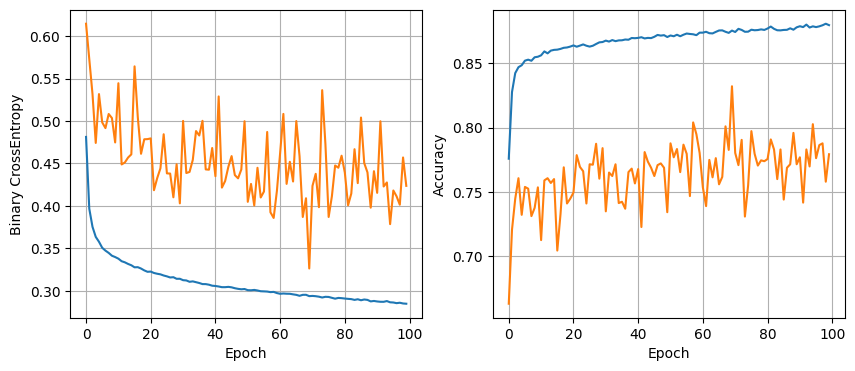

In [ ]:
plot_history(history)

In [ ]:
def train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn = tf.keras.Sequential([
        tf.keras.layers.Dense(32, activation="relu", input_shape=(9,)),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(32, activation="relu"),
        tf.keras.layers.Dense(1, activation="sigmoid")
    ])
  nn.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss = 'binary_crossentropy', metrics = ['accuracy'])
  history = nn.fit(
        x_train, y_train, epochs=epochs, batch_size=batch_size , validation_split=0.2, verbose=0)
  return nn, history

In [ ]:
least_val_loss = float('inf')
least_loss_model = None
epochs=100
for nodes in [16, 32, 64]:
  for dropout_prob in [0,0.2]:
    for lr in [0.01,0.005,0.001]:
      for batch_size in [32,64,128]:
        print(f"{nodes} nodes, dropout{dropout_prob}, lr {lr}, batch_size {batch_size}")
        model,history=train_model(x_train,y_train,nodes,dropout_prob,lr,batch_size,epochs)
        plot_history(history)
        val_loss=model.evaluate(x_valid, y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
y_pred = least_loss_model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

In [ ]:
print(classification_report(y_test,y_pred))